In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal
%matplotlib inline

In [2]:
gt = np.asarray([[99,0],[99,38],[98,39],[97,45],[95,65],[94,77],[95,83],[89,93],[88,100],[96,107],
[97,110],[98,121],[99,128],[99,247],[97,248],[95,254],[93,257],[92,263],[93,275],[95,283],[97,286],[98,289],
[99,305],[99,479],[97,480],[96,488],[97,491],[93,502],[90,505],[91,514],[92,520],[96,523],[98,536],[99,538],[99,729],
[96,730],[92,736],[91,740],[90,742],[93,760],[96,763],[97,766],[98,769],[99,772],[99,896]])

fs = 30
ground_truth_RH = np.zeros(gt[-1][1]*fs)
for i in range(len(gt)-1):
    start = gt[i,1]*fs
    end = gt[i+1,1]*fs
    ground_truth_RH[start:end] = gt[i,0]

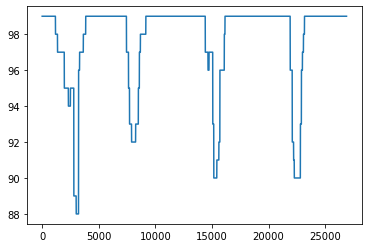

In [3]:
plt.plot(ground_truth_RH)

## Load in the data

In [4]:
E2_data = np.load('E2_data.npy')
RH_data,LH_data = E2_data[0],E2_data[1]
RH_r, RH_g, RH_b = RH_data[0], RH_data[1], RH_data[2]
LH_r, LH_g, LH_b = LH_data[0], LH_data[1], LH_data[2]

In [51]:
def butterworth_filter(data, lowcut, highcut, fs, order=5):
    '''
    band pass filter
    '''
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return signal.lfilter(b, a, data)

def AC(sig):
    '''
    calculates AC component of signal given cutoffs in https://www.osapublishing.org/boe/fulltext.cfm?uri=boe-12-3-1746&id=448656#e6
    tinkering, so cutoffs might be slightly different
    '''
    #sig = signal.detrend(sig)
    #sig = sliding_window_demean(sig, 5)
    signal_AC = butterworth_filter(sig, 0.5, 5, 30, order=5) #cut is 0.5
    return signal_AC

def plot_powerspectrum(sig,title):
    x = sig
    fs = 30
    f, Pxx_den = signal.welch(x, fs, nperseg=1024)
    plt.semilogy(f, Pxx_den)
    plt.ylim([0.5e-3, 1])
    plt.yticks([])
    plt.xlim([0,6])
    plt.xticks(fontsize= 40)
#     plt.title('RH Green AC Spectrum')
#     plt.title(title)
#     plt.xlabel('frequency [Hz]')
#     plt.ylabel('PSD [V**2/Hz]')
    plt.show()
    return None
    

Text(0.5, 1.0, 'Avg Green Channel vs Frame no.')

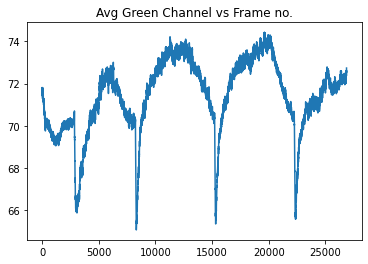

In [6]:
plt.plot(range(len(RH_g)),RH_g)
plt.title('Avg Green Channel vs Frame no.')

In [7]:
RH_g_ms = RH_g - np.mean(RH_g)

Text(0.5, 1.0, 'Green AC vs Frame no.')

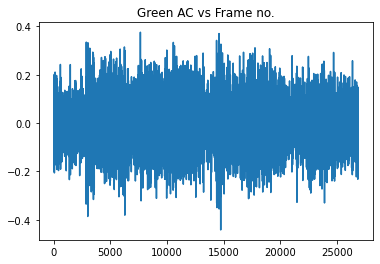

In [8]:
RH_g_AC = AC(RH_g_ms)
plt.plot(range(len(RH_g_AC)),RH_g_AC)
plt.title('Green AC vs Frame no.')

### AC Over Entire 15 min Window

In [26]:
plot_powerspectrum(RH_g_AC)

TypeError: plot_powerspectrum() missing 1 required positional argument: 'title'

## Power Spectra for desaturations (bp cuff inflated and spo2 dropping)

In [10]:
desat1_start = 45 * fs
desat1_stop = 93 * fs
desat1 = RH_g_AC[desat1_start:desat1_stop]

desat2_start = 248 * fs
desat2_stop = 263 * fs
desat2 = RH_g_AC[desat2_start:desat2_stop]

desat3_start = 480 * fs
desat3_stop = 505 * fs
desat3 = RH_g_AC[desat3_start:desat3_stop]

desat4_start = 730 * fs
desat4_stop = 742 * fs
desat4 = RH_g_AC[desat4_start:desat4_stop]

desat_all = np.concatenate((desat1,desat2,desat3,desat4))


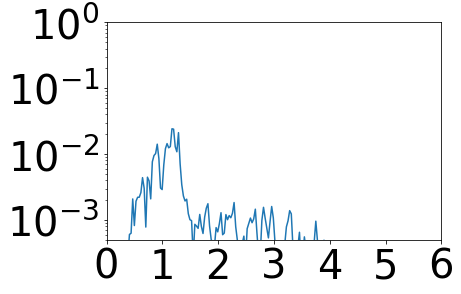

In [50]:
plot_powerspectrum(desat_all,'Desaturation')


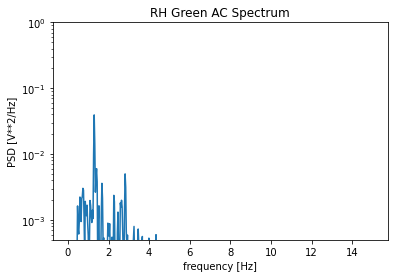

In [12]:
plot_powerspectrum(desat1)

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 450, using nperseg = 450
  .format(nperseg, input_length))


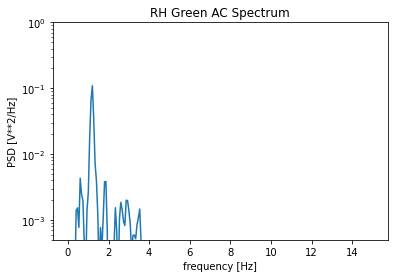

In [13]:
plot_powerspectrum(desat2)

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 750, using nperseg = 750
  .format(nperseg, input_length))


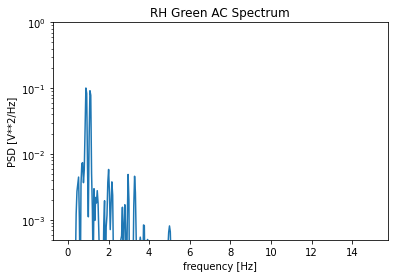

In [14]:
plot_powerspectrum(desat3)

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 360, using nperseg = 360
  .format(nperseg, input_length))


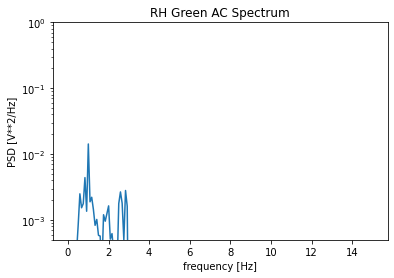

In [14]:
plot_powerspectrum(desat4)

### Power Spectra for resaturations (spo2 rising)

In [15]:
resat1_start = 100 * fs
resat1_stop = 128 * fs
resat1 = RH_g_AC[resat1_start:resat1_stop]

resat2_start = 275 * fs
resat2_stop = 305 * fs
resat2 = RH_g_AC[resat2_start:resat2_stop]

resat3_start = 514 * fs
resat3_stop = 538 * fs
resat3 = RH_g_AC[resat3_start:resat3_stop]

resat4_start = 760 * fs
resat4_stop = 772 * fs
resat4 = RH_g_AC[resat4_start:resat4_stop]

resat_all = np.concatenate((resat1,resat2,resat3,resat4))

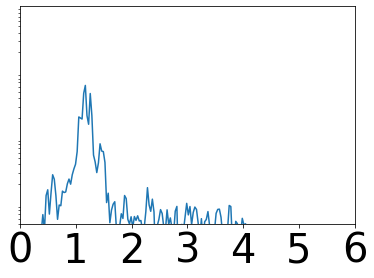

In [52]:
plot_powerspectrum(resat_all, 'Resaturation')

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 900, using nperseg = 900
  .format(nperseg, input_length))


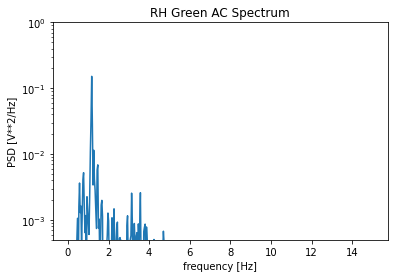

In [17]:
plot_powerspectrum(resat2)

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 720, using nperseg = 720
  .format(nperseg, input_length))


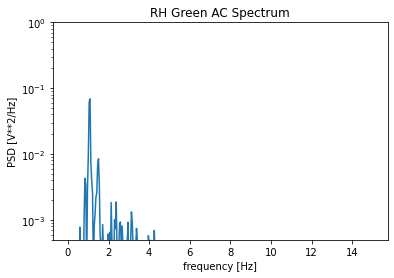

In [18]:
plot_powerspectrum(resat3)

//anaconda3/lib/python3.7/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 1024 is greater than input length  = 360, using nperseg = 360
  .format(nperseg, input_length))


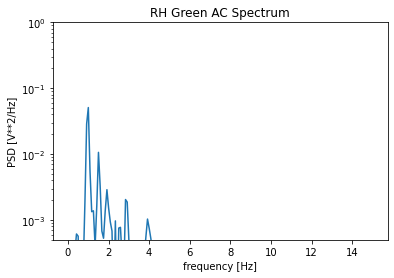

In [19]:
plot_powerspectrum(resat4)

### Power Spectra for constant saturation (at 99%)

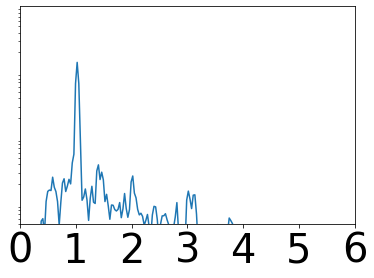

In [53]:
start = 538 * fs
stop = 729 * fs
plot_powerspectrum(RH_g_AC[start:stop],'Constant Saturation')

